Plot multiple runs to see how truly sensitive everything is to parameter settings.

In [42]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
%matplotlib inline

from nengo_learn_assoc_mem.paths import data_path

In [31]:
read_path = os.path.join(data_path, "mixed_mean")

In [32]:
fan1_resp = []
fan2_resp = []
foil1_resp = []
foil2_resp = []

for seed_val in range(10):
    with h5py.File(os.path.join(read_path, f"mixed_voja_more_neurons_{seed_val}.h5"), "r") as fi:
        fan1_resp.append(np.array(fi["resp/fan1"]))
        fan2_resp.append(np.array(fi["resp/fan2"]))
        foil1_resp.append(np.array(fi["resp/foil1"]))
        foil2_resp.append(np.array(fi["resp/foil2"]))

In [33]:
len(fan1_resp)

10

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


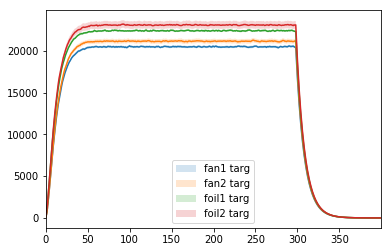

In [34]:
sns.tsplot(fan1_resp, color="C0")
sns.tsplot(fan2_resp, color="C1")
sns.tsplot(foil1_resp, color="C2")
sns.tsplot(foil2_resp, color="C3")

plt.legend(["fan1 targ", "fan2 targ", "foil1 targ", "foil2 targ"], facecolor=None)

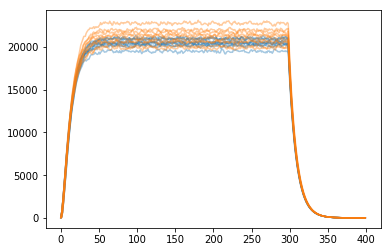

In [38]:
plt.plot(np.array(fan1_resp).T, alpha=0.4, color="C0")
plt.plot(np.array(fan2_resp).T, alpha=0.4, color="C1")

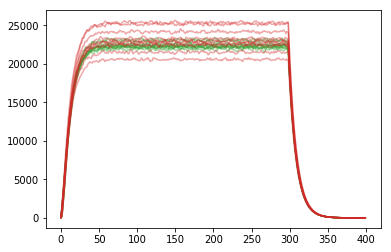

In [39]:
plt.plot(np.array(foil1_resp).T, alpha=0.4, color="C2")
plt.plot(np.array(foil2_resp).T, alpha=0.4, color="C3")

In [46]:
filt = nengo.Lowpass(0.01)

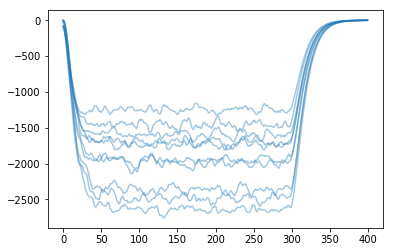

In [50]:
for f1, f2 in zip(fan1_resp, foil1_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

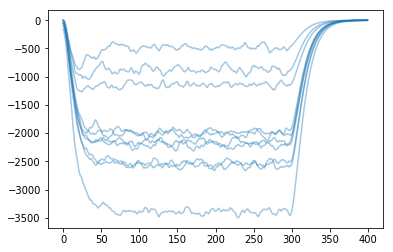

In [51]:
for f1, f2 in zip(fan2_resp, foil2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")

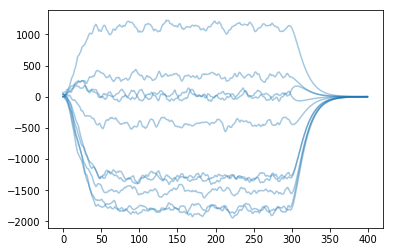

In [53]:
for f1, f2 in zip(fan1_resp, fan2_resp):
    plt.plot(filt.filt(f1 - f2), alpha=0.4, color="C0")